In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
app_train=pd.read_csv('application_train.csv')

In [3]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train.shape

(307511, 122)

In [5]:
app_test=pd.read_csv('application_test.csv')

In [6]:
app_test.shape

(48744, 121)

In [7]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
app_train.TARGET.value_counts()

,count
TARGET,
0,282686
1,24825


In [9]:
#target is discrete and given >> supervised learning problem >> classification problem

In [10]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
app_train.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [12]:
missing_percentage=((app_train.isna().sum()/len(app_train))*100).sort_values(ascending=False)

In [13]:
missing_percentage[missing_percentage>0]

,0
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_MEDI,69.872297
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
...,...
EXT_SOURCE_2,0.214626
AMT_GOODS_PRICE,0.090403
AMT_ANNUITY,0.003902
CNT_FAM_MEMBERS,0.000650


In [14]:
missing_percentage[missing_percentage>0][:50]

,0
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_MEDI,69.872297
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,68.354953


In [15]:
# Few Algorithms don't require missing value treatment, like XGBoost

In [16]:
app_train.dtypes.value_counts()

,count
float64,65
int64,41
object,16


In [17]:
# we have to do encoding for the above 16 columns >> string column to integer column

In [18]:
app_train.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [19]:
for i in app_train.select_dtypes('object').columns:
  print("The no of unique values for", i, "is", app_train[i].nunique())

The no of unique values for NAME_CONTRACT_TYPE is 2
The no of unique values for CODE_GENDER is 3
The no of unique values for FLAG_OWN_CAR is 2
The no of unique values for FLAG_OWN_REALTY is 2
The no of unique values for NAME_TYPE_SUITE is 7
The no of unique values for NAME_INCOME_TYPE is 8
The no of unique values for NAME_EDUCATION_TYPE is 5
The no of unique values for NAME_FAMILY_STATUS is 6
The no of unique values for NAME_HOUSING_TYPE is 6
The no of unique values for OCCUPATION_TYPE is 18
The no of unique values for WEEKDAY_APPR_PROCESS_START is 7
The no of unique values for ORGANIZATION_TYPE is 58
The no of unique values for FONDKAPREMONT_MODE is 4
The no of unique values for HOUSETYPE_MODE is 3
The no of unique values for WALLSMATERIAL_MODE is 7
The no of unique values for EMERGENCYSTATE_MODE is 2


In [20]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

,0
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


In [21]:
# in one hot encoding if there are 58 unique values 58 more columns would be created leading to 58 * 58 results

In [22]:
# ONE HOT ENCODING

In [23]:
cat_df=app_train.select_dtypes('object')

In [24]:
app_train=pd.get_dummies(app_train, dtype=int)

In [25]:
app_test=pd.get_dummies(app_test, dtype=int)

In [26]:
app_train.shape

(307511, 246)

In [27]:
app_test.shape

(48744, 242)

In [28]:
# To align train and test data as the number of columns in train data are 4 more than test data as train data had more unique values and hence 4 more columns for 4 more unique values

In [29]:
train_labels=app_train['TARGET']

In [30]:
# Use merge or join but on columns, not done using merge or join done using align

In [31]:
app_train, app_test = app_train.align(app_test, join='inner', axis=1) #keep only columns present in both the data frames

In [32]:
app_train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
app_train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
app_train['TARGET'] = train_labels

In [35]:
app_train

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1,0,0,0,0,0,0,1,0,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,...,0,0,0,0,0,1,0,1,0,0
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,...,0,0,0,0,0,1,0,1,0,0
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,...,0,0,0,0,1,0,0,1,0,0
307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,...,0,0,0,0,0,1,0,1,0,1


In [36]:
# outlier detection is very very important

In [37]:
app_train.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570,0.080729
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679,0.272419
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# when we did describe we observed that few days are in negative, number of days employed is 1000 years, meaning there are some insane values or typos, we have to deal with them

In [39]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [40]:
app_train['DAYS_BIRTH'].describe()

,DAYS_BIRTH
count,307511.000000
mean,16036.995067
std,4363.988632
min,7489.000000
25%,12413.000000
50%,15750.000000
75%,19682.000000
max,25229.000000


<Axes: ylabel='DAYS_BIRTH'>

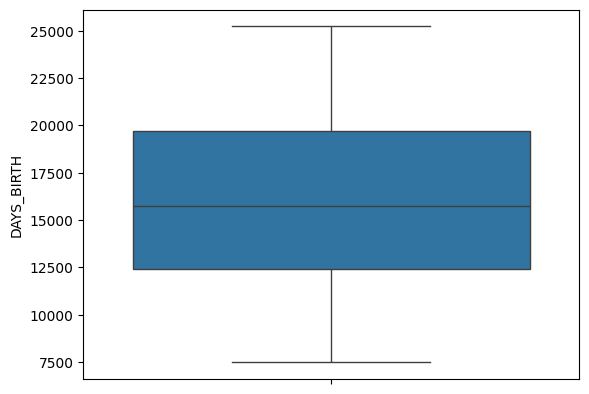

In [41]:
sns.boxplot(app_train['DAYS_BIRTH'])

In [42]:
# to detect outliers we can use box plot and dist plot, also you can see the difference between the quartiles of the data and check if there is huge difference in 75 precentile and 100 percentile values
# if its a huge difference then outlier is present otherwise it's not present
# huge means the ratio between percentiles (0-25, 25-50) should be uniform

In [43]:
app_train['DAYS_EMPLOYED'].describe()

,DAYS_EMPLOYED
count,307511.000000
mean,63815.045904
std,141275.766519
min,-17912.000000
25%,-2760.000000
50%,-1213.000000
75%,-289.000000
max,365243.000000


<Axes: ylabel='Frequency'>

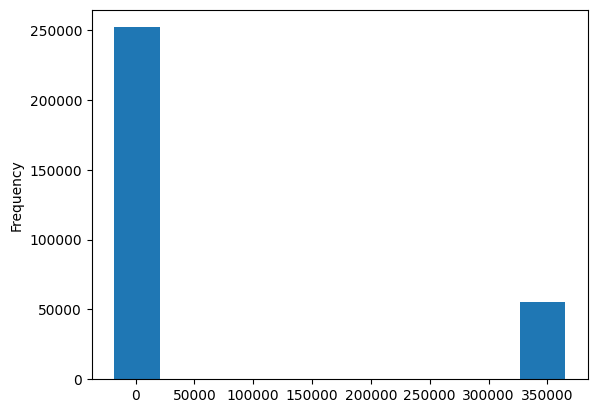

In [44]:
app_train['DAYS_EMPLOYED'].plot.hist()

In [45]:
app_train[app_train['DAYS_EMPLOYED'] == 365243]

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
8,100011,0,112500.000,1019610.0,33826.5,913500.0,0.018634,20099,365243,-7427.0,...,0,0,0,0,0,0,0,0,0,0
11,100015,0,38419.155,148365.0,10678.5,135000.0,0.015221,20417,365243,-5246.0,...,0,0,0,0,0,0,0,0,0,0
23,100027,0,83250.000,239850.0,23850.0,225000.0,0.006296,24827,365243,-9012.0,...,0,1,0,0,0,0,0,1,0,0
38,100045,0,99000.000,247275.0,17338.5,225000.0,0.006207,23920,365243,-9817.0,...,0,0,0,0,0,1,0,1,0,0
43,100050,0,108000.000,746280.0,42970.5,675000.0,0.010966,23548,365243,-5745.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,202500.000,703728.0,29943.0,607500.0,0.031329,22414,365243,-11976.0,...,0,0,0,0,0,1,0,1,0,0
307483,456227,0,99000.000,247275.0,16479.0,225000.0,0.007330,24911,365243,-11211.0,...,0,0,0,0,0,1,0,1,0,0
307487,456231,0,117000.000,1071909.0,31473.0,936000.0,0.010147,23125,365243,-5485.0,...,0,0,0,0,0,0,0,0,0,0
307505,456249,0,112500.000,225000.0,22050.0,225000.0,0.022800,24384,365243,-7369.0,...,0,0,0,0,1,0,0,1,0,0


In [46]:
# there are 55374 anomalous days of employment

In [47]:
55374/len(app_train)

0.18007160719453938

In [48]:
# DAYS_EMPLOYED is one of the important variables
# what to do, mean, median, mode or drop, capping
# there is no business team, we can make a column which will flag that its anomaly and put np.nan for the outlier values in original column

In [49]:
app_train['DAYS_EMPLOYED'] == 365243

,DAYS_EMPLOYED
0,False
1,False
2,False
3,False
4,False
...,...
307506,False
307507,True
307508,False
307509,False


In [50]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

In [51]:
app_train['DAYS_EMPLOYED_ANOM']

,DAYS_EMPLOYED_ANOM
0,False
1,False
2,False
3,False
4,False
...,...
307506,False
307507,True
307508,False
307509,False


In [52]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace({365243: np.nan})

<Axes: ylabel='Frequency'>

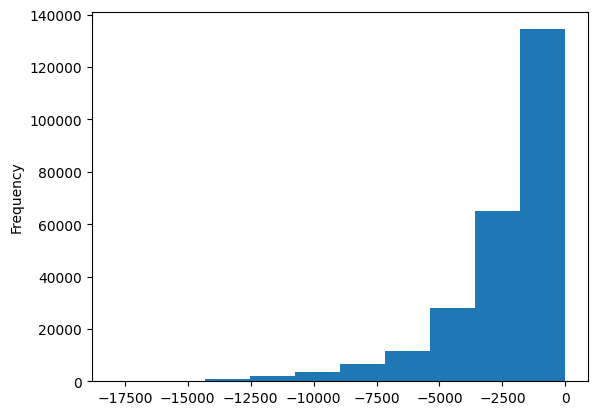

In [53]:
app_train['DAYS_EMPLOYED'].plot.hist()

In [54]:
len(app_test[app_test['DAYS_EMPLOYED']==365243])

9274

In [55]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243

In [56]:
app_test['DAYS_EMPLOYED'] = app_test['DAYS_EMPLOYED'].replace({365243: np.nan})

In [57]:
# correlation can help you know which arethe important columns

In [58]:
correlations = app_train.corr()['TARGET'].sort_values()

In [59]:
correlations.head(15)

,TARGET
EXT_SOURCE_3,-0.178919
EXT_SOURCE_2,-0.160472
EXT_SOURCE_1,-0.155317
DAYS_BIRTH,-0.078239
NAME_EDUCATION_TYPE_Higher education,-0.056593
CODE_GENDER_F,-0.054704
NAME_INCOME_TYPE_Pensioner,-0.046209
DAYS_EMPLOYED_ANOM,-0.045987
ORGANIZATION_TYPE_XNA,-0.045987
FLOORSMAX_AVG,-0.044003


In [60]:
correlations.tail(15)

,TARGET
DAYS_REGISTRATION,0.041975
OCCUPATION_TYPE_Laborers,0.043019
FLAG_DOCUMENT_3,0.044346
REG_CITY_NOT_LIVE_CITY,0.044395
FLAG_EMP_PHONE,0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special,0.049824
REG_CITY_NOT_WORK_CITY,0.050994
DAYS_ID_PUBLISH,0.051457
CODE_GENDER_M,0.054713
DAYS_LAST_PHONE_CHANGE,0.055218


In [61]:
app_train['DAYS_BIRTH'] = abs (app_train['DAYS_BIRTH'])

In [62]:
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982694)

(array([13679., 33111., 38424., 41746., 40356., 34339., 33544., 32650.,
        27685., 11977.]),
 array([ 7489.,  9263., 11037., 12811., 14585., 16359., 18133., 19907.,
        21681., 23455., 25229.]),
 <BarContainer object of 10 artists>)

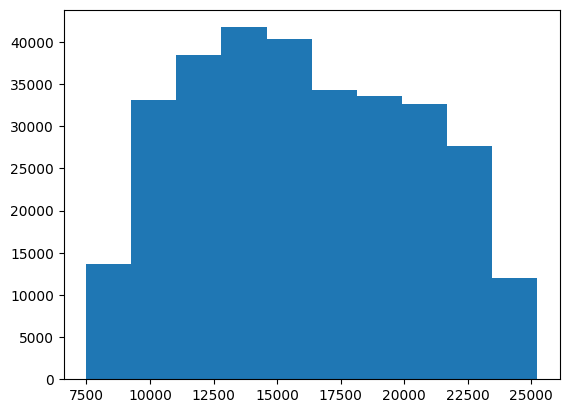

In [63]:
plt.hist(app_train['DAYS_BIRTH'])

<Axes: xlabel='DAYS_BIRTH', ylabel='Density'>

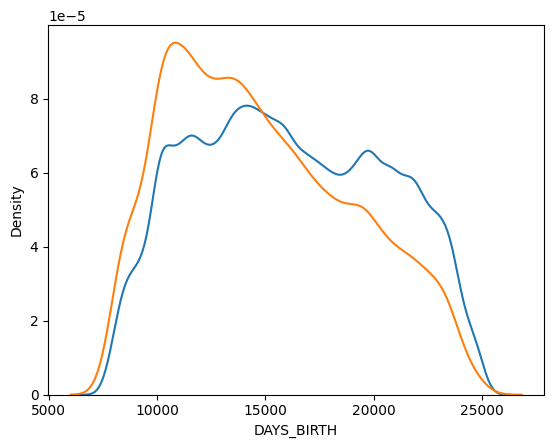

In [64]:
sns.kdeplot(app_train.loc[app_train['TARGET']==0, 'DAYS_BIRTH'], label= 'TARGET = 0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1, 'DAYS_BIRTH'], label= 'TARGET = 1')

In [65]:
# observation >> younger people have paid the loan more
# how to put this knowledge to data or modelling since the correlation seems to be negative but it is an important feature

In [66]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]

In [67]:
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

In [68]:
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))

In [69]:
age_data

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
...,...,...,...,...
307506,0,9327,25.553425,"(25.0, 30.0]"
307507,0,20775,56.917808,"(55.0, 60.0]"
307508,0,14966,41.002740,"(40.0, 45.0]"
307509,1,11961,32.769863,"(30.0, 35.0]"


In [70]:
age_groups = age_data.groupby('YEARS_BINNED').mean()

<BarContainer object of 10 artists>

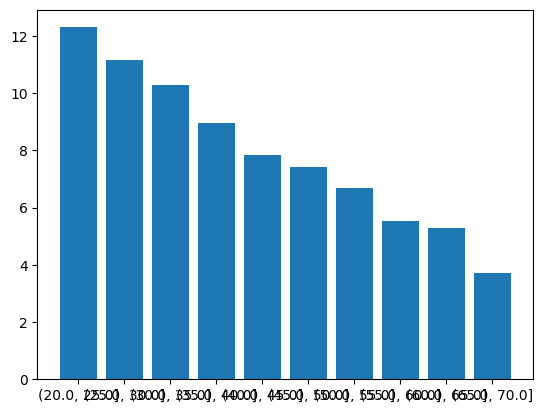

In [71]:
plt.bar(age_groups.index.astype(str), age_groups['TARGET']*100)

In [72]:
# younger applicants are likely to repay the loan.

In [73]:
# ML MODELLING PIPELINE
# DATA INGESTION >> READING DATA FROM A SOURCE >> SQL< EXCEL
# DATA VALIDATION >> SANITY CHECK
# DATA TRANSFORMATION
# EDA
# DATA PREPROCESSING
# MODEL BUILDING

In [74]:
app_train.shape

(307511, 244)

In [75]:
app_test.shape

(48744, 243)

In [76]:
app_train.columns[app_train.columns.str.startswith('EXT_S')]

Index(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], dtype='object')

In [77]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

In [78]:
ext_data.corr()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.155317,-0.160472,-0.178919
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000


<Axes: >

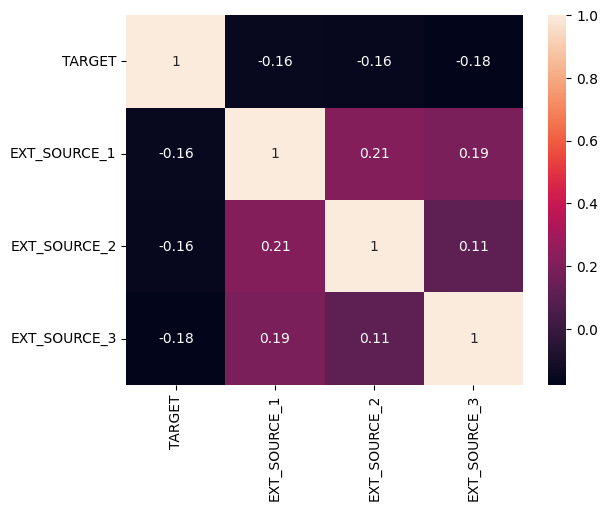

In [79]:
sns.heatmap(ext_data.corr(), annot=True)

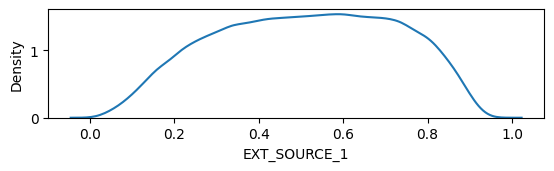

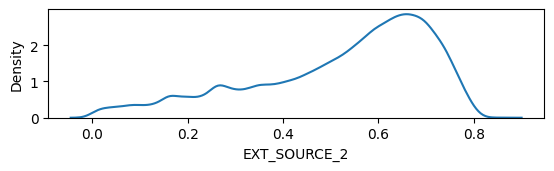

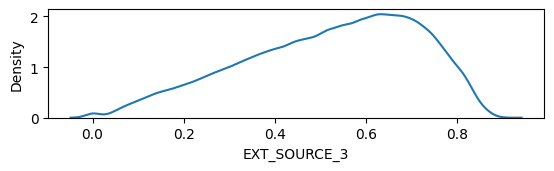

In [80]:
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
  plt.figure(i)
  plt.subplot(3,1,i+1)
  sns.kdeplot(ext_data.loc[ext_data['TARGET']==0, source], label='TARGET = 0')

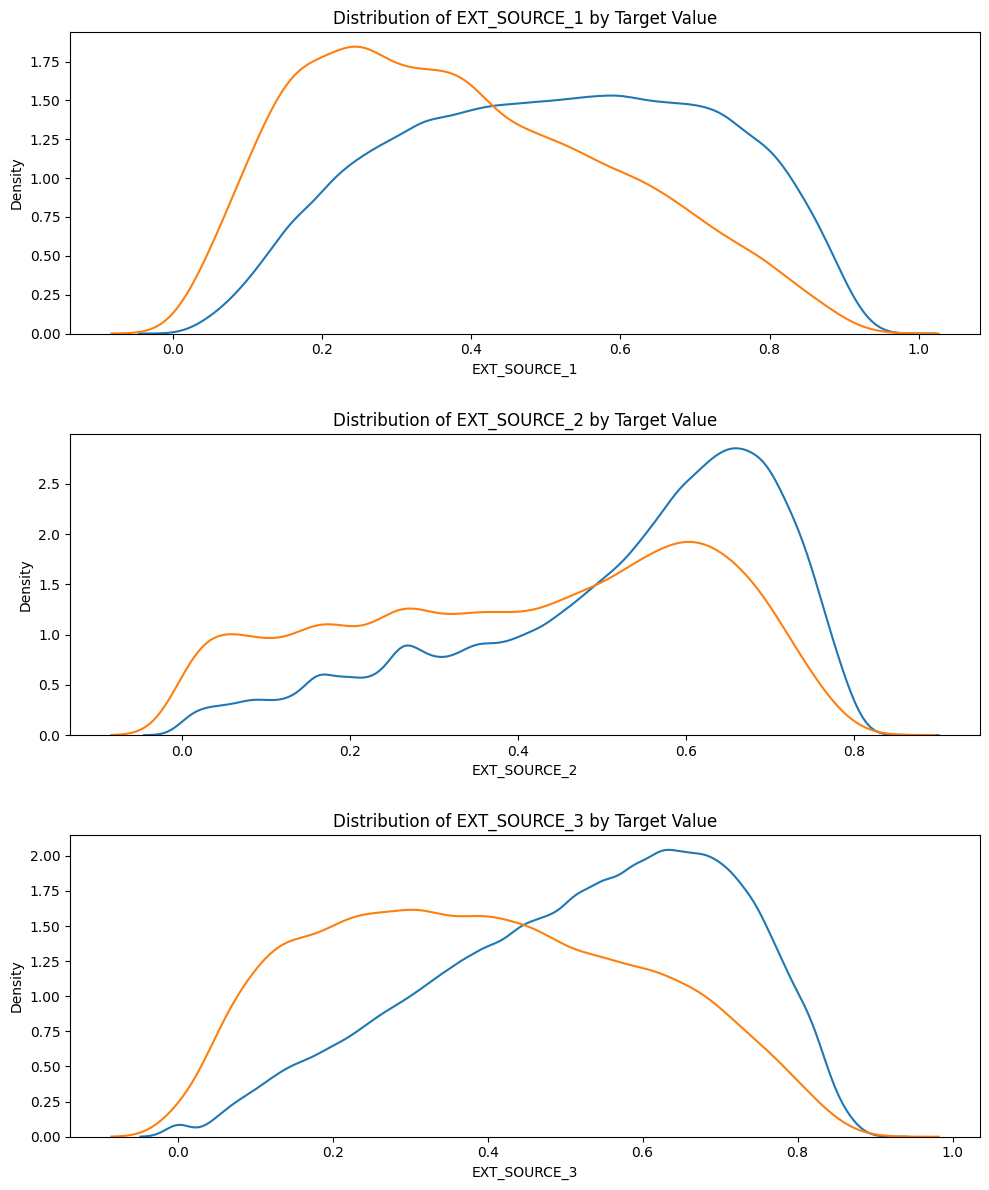

In [81]:
plt.figure(figsize = (10,12))

for i, source in enumerate (['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

  plt.subplot(3,1,i+1)

  sns.kdeplot(app_train.loc[app_train['TARGET'] == 0 , source], label = "TARGET == 0")

  sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = "TARGET == 1")

  plt.title("Distribution of %s by Target Value" % source)
  plt.xlabel("%s" % source)
  plt.ylabel("Density");

plt.tight_layout(h_pad=2.5)

In [82]:
# seeing above plot we understand there is some relationship between people paid loan and not paid loan but linear correlation is not clear

In [83]:
poly_features = app_train[['TARGET','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [84]:
# We are doing missing value treatment for better polynomial regression

In [85]:
from sklearn.impute import SimpleImputer

In [86]:
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

In [87]:
imputer = SimpleImputer(strategy = 'median')
poly_features_imputed = imputer.fit_transform(poly_features)
poly_features_test_imputed = imputer.fit_transform(poly_features_test)

In [88]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(poly_features_imputed)

PolynomialFeatures(degree=3)

In [89]:
poly_features = poly_transformer.transform(poly_features_imputed)
poly_features_test = poly_transformer.transform(poly_features_test_imputed)

In [90]:
poly_features.shape

(307511, 35)

In [91]:
poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2', 'EXT_SOURCE_1^3',
       'EXT_SOURCE_1^2 EXT_SOURCE_2', 'EXT_SOURCE_1^2 EXT_SOURCE_3',
       'EXT_SOURCE_1^2 DAYS_BIRTH', 'EXT_SOURCE_1 EXT_SOURCE_2^2',
       'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
       'EXT_SOURCE_1 EXT_SOURCE_3^2',
       'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_1 DAYS_BIRTH^2', 'EXT_SOURCE_2^3',
       'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2^2 DAYS_BIRTH',
       'EXT_SOURCE_2 EXT_SOURCE_3^2',
       'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_2 DAYS_BIRTH^2', 'EXT_SOURCE_3^3',
       'EXT_SOURCE_3^2 DAYS_BIRTH', 'EXT_SOURCE_3 DAYS_BIR

In [92]:
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target.values

poly_corrs = poly_features.corr()['TARGET'].sort_values()

In [93]:
poly_corrs

,TARGET
EXT_SOURCE_2 EXT_SOURCE_3,-0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3,-0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,-0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3,-0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2,-0.172282
EXT_SOURCE_1 EXT_SOURCE_2,-0.166625
EXT_SOURCE_1 EXT_SOURCE_3,-0.164065
EXT_SOURCE_2,-0.160295
EXT_SOURCE_2 DAYS_BIRTH,-0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2,-0.156867


In [94]:
# Put test features into dataframe with correct feature names
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add SK_ID_CURR to train and test polynomial feature sets
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']

# Merge polynomial features into training and testing data
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes by keeping only the columns present in both
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Output new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 278)
Testing data with polynomial features shape:   (48744, 278)


In [95]:
app_train.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes', 'TARGET',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=244)

In [96]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT']/app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_INCOME_PERCENT']

,CREDIT_INCOME_PERCENT
0,2.007889
1,4.790750
2,2.000000
3,2.316167
4,4.222222
...,...
307506,1.617143
307507,3.743750
307508,4.429176
307509,2.164368


In [97]:
app_train_domain ['DAYS_EMPLOYED_PERCENT'] = abs(app_train_domain['DAYS_EMPLOYED'])/app_train_domain['DAYS_BIRTH']

In [98]:
app_train_domain ['DAYS_EMPLOYED_PERCENT']

,DAYS_EMPLOYED_PERCENT
0,0.067329
1,0.070862
2,0.011814
3,0.159905
4,0.152418
...,...
307506,0.025303
307507,NaN
307508,0.529266
307509,0.400134


In [99]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT']/app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = abs(app_test_domain['DAYS_EMPLOYED'])/app_test_domain['DAYS_BIRTH']

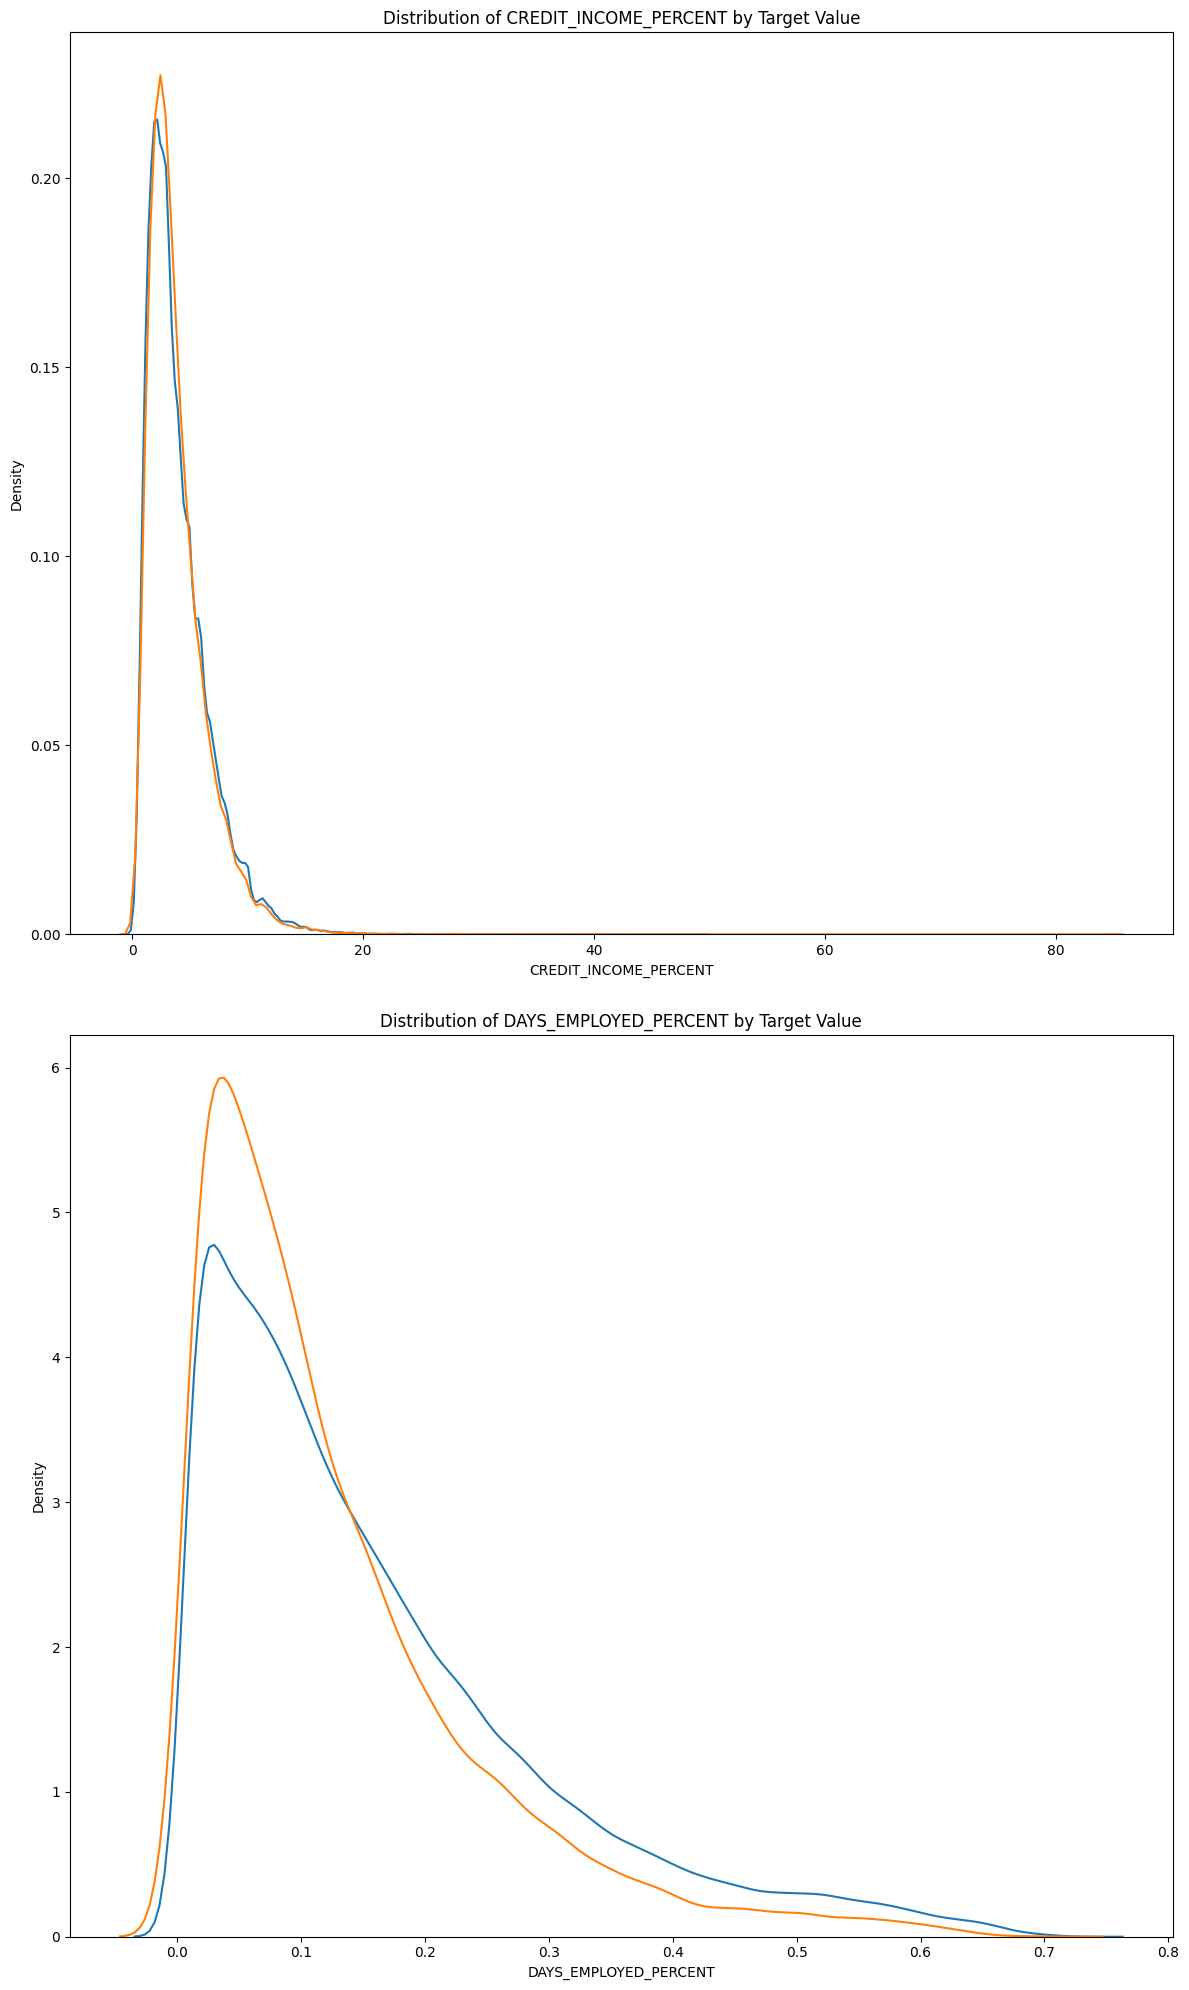

In [100]:
plt.figure(figsize=(12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT']):
  # create a new subplot for each source
  plt.subplot(2, 1, i+1)

  # plot repaid loans
  sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, feature], label = 'target==0')

  # plot loans that were not repaid
  sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, feature], label = 'target==1')

  # label the plots
  plt.title('Distribution of %s by Target Value' % feature)
  plt.xlabel('%s' % feature)
  plt.ylabel('Density')

plt.tight_layout(h_pad=2.5)


In [101]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if 'TARGET' in app_train_domain:
  train = app_train.drop(columns = ['TARGET'])
else:
  train = app_train.copy()


test = app_test.copy()


train, test = train.align(test, join = 'inner', axis = 1)



imputer = SimpleImputer(strategy = 'median')
scaler = MinMaxScaler()

In [102]:
imputer

SimpleImputer(strategy='median')

In [103]:
scaler

MinMaxScaler()

In [104]:
# fit and transform will happen on train data and transform will happen on test data >> to avoid data leakage

In [105]:
train = imputer.fit_transform(train)
test = imputer.transform(test)

In [106]:
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [107]:
train_labels.shape

(307511,)

In [108]:
train.shape

(307511, 243)

In [109]:
X = train
y = train_labels

In [110]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [111]:
y_pred = log_reg.predict(X)

In [112]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [113]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y, y_pred)

0.9191833788059615

In [114]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    282686
           1       0.48      0.01      0.02     24825

    accuracy                           0.92    307511
   macro avg       0.70      0.50      0.49    307511
weighted avg       0.88      0.92      0.88    307511



In [115]:
from sklearn.naive_bayes import GaussianNB
g_clf = GaussianNB()
g_clf.fit(X, y)

GaussianNB()

In [116]:
y_pred = g_clf.predict(X)

In [117]:
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

0.1853689786706817
              precision    recall  f1-score   support

           0       0.95      0.12      0.21    282686
           1       0.09      0.93      0.16     24825

    accuracy                           0.19    307511
   macro avg       0.52      0.53      0.18    307511
weighted avg       0.88      0.19      0.21    307511



In [118]:
# SVC is a very slow algorithm because in SVM we need to create optimal marginal line and plane and go through each and every datapoint for execution
# Hence we are not using it, execution time was over 10 mins!!!

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)

RandomForestClassifier()

In [120]:
y_pred = rf_clf.predict(X)

In [121]:
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

0.9999544731733174
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    282686
           1       1.00      1.00      1.00     24825

    accuracy                           1.00    307511
   macro avg       1.00      1.00      1.00    307511
weighted avg       1.00      1.00      1.00    307511



In [122]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(use_label_encoder = False, eval_metrics = 'logloss', random_state = 42)

In [123]:
param_grid = {
              'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5],
              'subsample': [0.8, 1.0],
              'colsample_bytree': [0.8, 1.0],
              'gamma' : [0, 1]
}


In [124]:
"""from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = xgb_clf, param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy', # use "roc_auc" for binary or "neg_log_loss" if needed
                           verbose = 1)
grid_search.fit(X, y)"""

'from sklearn.model_selection import GridSearchCV\n\ngrid_search = GridSearchCV(estimator = xgb_clf, param_grid = param_grid, cv = 3, n_jobs = -1, scoring = \'accuracy\', # use "roc_auc" for binary or "neg_log_loss" if needed\n                           verbose = 1)\ngrid_search.fit(X, y)'

In [125]:
# Grid search CV taking a lot of time more than an hour hence the previous block of code is commented